<a href="https://colab.research.google.com/github/imranahmed123/DataScience-AI-ML/blob/main/M3_NB_MiniProject_3_Emotion_Classification_from_Speech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini-Project: Speech Emotion Classification

## Problem Statement

Build a model to recognize emotion from speech using Ensemble learning

## Learning Objectives

At the end of the mini-project, you will be able to :

* extract the features from audio data
* implement ML classification algorithms individually and as Ensembles, to classify emotions
* record the voice sample and test it with trained model

## Dataset

**TESS Dataset**

The first dataset chosen for this mini-project is the [TESS](https://dataverse.scholarsportal.info/dataset.xhtml?persistentId=doi:10.5683/SP2/E8H2MF) (Toronto emotional speech set) dataset. It contains 2880 files.  A set of 200 target words were spoken in the carrier phrase "Say the word _____' by two actresses and the sets were recorded in seven different emotions (anger, disgust, fear, happiness, pleasant surprise, sadness, and neutral). Both actresses spoke English as their first language, were university educated, and had musical training. Audiometric testing indicated that both actresses had thresholds within the normal range.

**Ravdess Dataset**

The second dataset chosen for this mini-project is [Ravdess](https://zenodo.org/record/1188976#.YLczy4XivIU) (The Ryerson Audio-Visual Database of Emotional Speech and Song). This dataset contains 1440 files: 60 trials per actor x 24 actors = 1440. The RAVDESS contains 24 professional actors (12 female, 12 male), vocalizing two lexically-matched statements in a neutral North American accent. Speech emotions includes calm, happy, sad, angry, fearful, surprise, and disgust expressions. Each expression is produced at two levels of emotional intensity (normal, strong), with an additional neutral expression.

**File naming convention**

Each of the 1440 files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 03-01-06-01-02-01-12.wav). These identifiers define the stimulus characteristics:

**Filename identifiers**

* Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
* Vocal channel (01 = speech, 02 = song).
* Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
* Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
* Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
* Repetition (01 = 1st repetition, 02 = 2nd repetition).
* Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

Filename example: `03-01-06-01-02-01-12.wav`

    - Audio-only - 03
    - Speech - 01
    - Fearful - 06
    - Normal intensity - 01
    - Statement "dogs" - 02
    - 1st Repetition - 01
    - 12th Actor - 12 Female, as the actor ID number is even.

## Information

**Speech Emotion Recognition (SER)** is the task of recognizing the emotion from  speech, irrespective of the semantics. Humans can efficiently perform this task as a natural part of speech communication, however, the ability to conduct it automatically using programmable devices is a field of active research.

Studies of automatic emotion recognition systems aim to create efficient, real-time methods of detecting the emotions of mobile phone users, call center operators and customers, car drivers, pilots, and many other human-machine communication users. Adding emotions to machines forms an important aspect of making machines appear and act in a human-like manner

Lets gain familiarity with some of the audio based features that are commonly used for SER.

**Mel scale** — The mel scale (derived from the word *melody*) is a perceptual scale of pitches judged by listeners to be equal in distance from one another. The reference point between this scale and normal frequency measurement is defined by assigning a perceptual pitch of 1000 mels to a 1000 Hz tone, 40 dB above the listener's threshold. Above about 500 Hz, increasingly large intervals are judged by listeners to produce equal pitch increments. Refer [here](https://towardsdatascience.com/learning-from-audio-the-mel-scale-mel-spectrograms-and-mel-frequency-cepstral-coefficients-f5752b6324a8) for more detailed information.

**Pitch** — how high or low a sound is. It depends on frequency, higher pitch is high frequency

**Frequency** — speed of vibration of sound, measures wave cycles per second

**Chroma** — Representation for audio where spectrum is projected onto 12 bins representing the 12 distinct semitones (or chroma). Computed by summing the log frequency magnitude spectrum across octaves.

**Fourier Transforms** — used to convert from time domain to frequency domain. Time domain shows how signal changes over time. Frequency domain shows how much of the signal lies within each given frequency band over a range of frequencies

**Librosa**

[Librosa](https://librosa.org/doc/latest/index.html) is a Python package, built for speech and audio analytics. It provides modular functions that simplify working with audio data and help in achieving a wide range of applications such as identification of the personal characteristics of different individuals' voice samples, detecting emotions from audio samples etc.

For further details on the Librosa package, refer [here](https://conference.scipy.org/proceedings/scipy2015/pdfs/brian_mcfee.pdf).


### **Kaggle Competition**

Please refer to the link for viewing the
[Kaggle Competition Document](https://drive.google.com/file/d/1V3Y8Q3M03Atn9oM1zqmW6jpuzSYm445e/view?usp=drive_link) and join the Kaggle Competition using the hyperlink given in this document under '*Kaggle* Competition site'.


## Grading = 10 Points

In [15]:
#@title Download the datasets and install packages
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/Ravdess_Tess.zip
!unzip -qq Ravdess_Tess.zip
# Install packages
!pip -qq install librosa soundfile
!pip -qq install wavio
print("Datasets downloaded successfully!")

replace ravdess/Actor_01/03-01-01-01-01-01-01_neutral.wav? [y]es, [n]o, [A]ll, [N]one, [r]ename: Datasets downloaded successfully!


### Import Neccesary Packages

In [16]:
import librosa
import librosa.display
import soundfile
import os, glob, pickle
import numpy as np
import pandas as pd
import IPython.display as ipd
from matplotlib import pyplot as plt
from datetime import datetime
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode
import warnings
warnings.filterwarnings('ignore')
# sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import VotingClassifier

### Work-Flow

* Load the TESS audio data and extract features and labels

* Load the Ravdess audio data and extract features

* Combine both the audio dataset features

* Train and test the model with TESS + Ravdess Data

* Record the team audio samples and add them to TESS + Ravdess data

* Train and test the model with TESS + Ravdess + Team Recorded (combined) data

* Test each of the models with live audio sample recording.

### Load the Tess data and Ravdess data audio files (1 point)

Hint: `glob.glob`

In [17]:
# YOUR CODE HERE
import glob
import os

# Define the paths to the datasets
tess_path = 'Tess/*/*.wav'
ravdess_path = 'ravdess/*/*.wav'

# Load the audio file paths
tess_files = glob.glob(tess_path)
ravdess_files = glob.glob(ravdess_path)

# Combine the file lists
all_files = tess_files + ravdess_files

print(f"Loaded {len(tess_files)} TESS files and {len(ravdess_files)} RAVDESS files. Total: {len(all_files)} files.")


Loaded 2679 TESS files and 1168 RAVDESS files. Total: 3847 files.


#### Play the sample audio

In [18]:
# YOUR CODE HERE
import IPython.display as ipd
import librosa

# Load a sample audio file
sample_audio_path = all_files[0]
sample_audio, sr = librosa.load(sample_audio_path, sr=None)

# Play the audio
ipd.Audio(sample_audio_path)


### Data Exploration and Visualization (1 point)

#### Visualize the distribution of all the labels

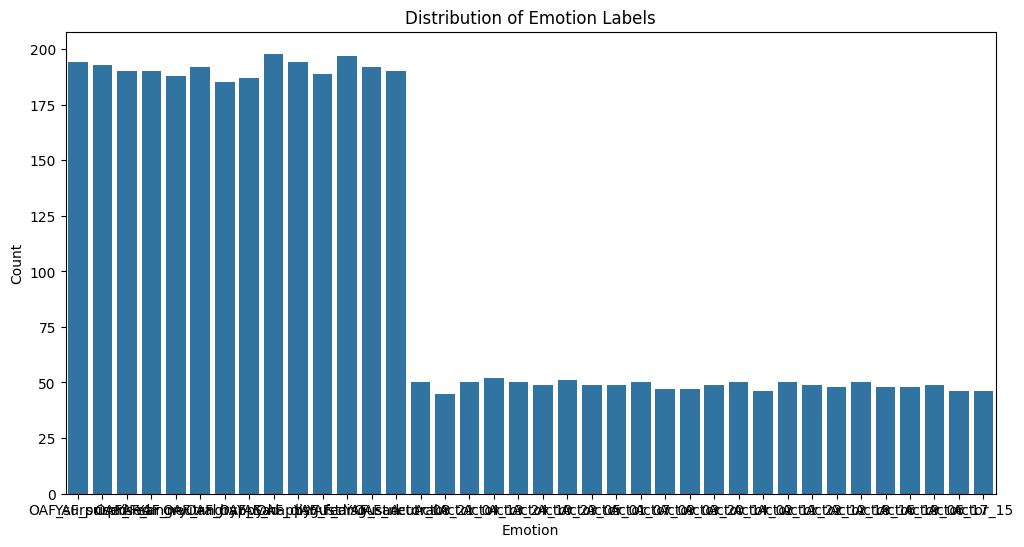

In [19]:
# YOUR CODE HERE
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Function to extract emotion label from file path
def get_emotion_from_path(path):
    return os.path.basename(os.path.dirname(path))

# Extract labels
labels = [get_emotion_from_path(path) for path in all_files]
label_counts = Counter(labels)

# Plot the distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=list(label_counts.keys()), y=list(label_counts.values()))
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Distribution of Emotion Labels')
plt.show()


#### Visualize sample audio signal using librosa

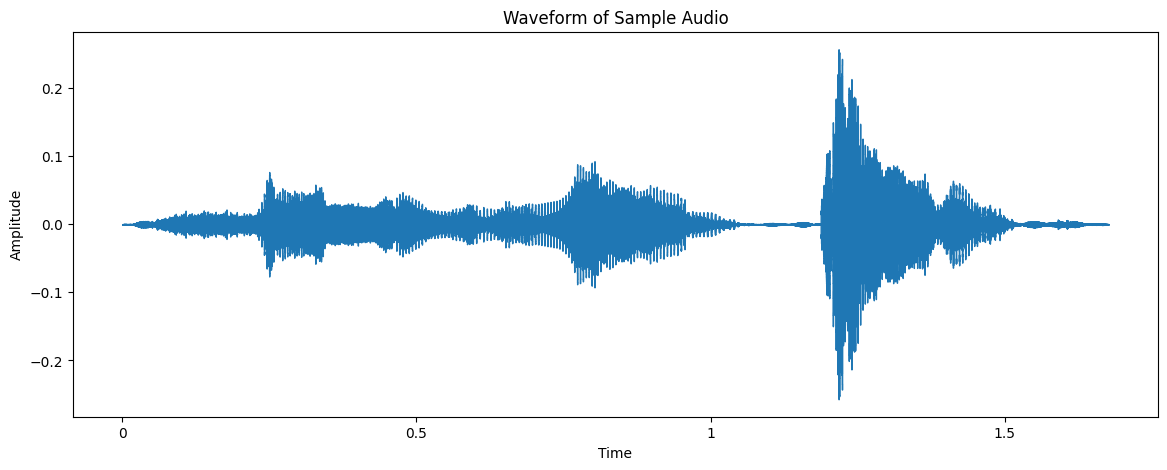

In [21]:
# YOUR CODE HERE
plt.figure(figsize=(14, 5))
librosa.display.waveshow(sample_audio, sr=sr)
plt.title('Waveform of Sample Audio')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()


In [22]:
# Create a dictionary to encode the emotions
emotion_dict = {emotion: idx for idx, emotion in enumerate(set(labels))}
print(emotion_dict)

# Function to encode emotions
def encode_emotion(emotion):
    return emotion_dict[emotion]

# Encode labels
encoded_labels = [encode_emotion(label) for label in labels]


{'Actor_09': 0, 'Actor_15': 1, 'OAF_Sad': 2, 'OAF_disgust': 3, 'YAF_fear': 4, 'Actor_23': 5, 'Actor_21': 6, 'Actor_13': 7, 'YAF_sad': 8, 'Actor_01': 9, 'YAF_happy': 10, 'OAF_angry': 11, 'Actor_03': 12, 'Actor_05': 13, 'Actor_12': 14, 'YAF_angry': 15, 'OAF_neutral': 16, 'Actor_24': 17, 'Actor_17': 18, 'OAF_happy': 19, 'YAF_surprised': 20, 'Actor_07': 21, 'Actor_18': 22, 'Actor_14': 23, 'Actor_16': 24, 'Actor_04': 25, 'Actor_19': 26, 'Actor_10': 27, 'Actor_22': 28, 'Actor_02': 29, 'YAF_neutral': 30, 'OAF_surprised': 31, 'Actor_20': 32, 'Actor_11': 33, 'Actor_08': 34, 'Actor_06': 35, 'YAF_disgust': 36, 'OAF_Fear': 37}


### Feature extraction (2 points)

Read one WAV file at a time using `Librosa`. An audio time series in the form of a 1-dimensional array for mono or 2-dimensional array for stereo, along with time sampling rate (which defines the length of the array), where the elements within each of the arrays represent the amplitude of the sound waves is returned by `librosa.load()` function. Refer to the supplementary notebook ('Audio feature extraction')

To know more about Librosa, explore the [link](https://librosa.org/doc/latest/feature.html)

In [27]:
def extract_features(file_path):
    # Load the audio file
    audio, sample_rate = librosa.load(file_path, sr=None)

    # Extract features
    # 1. MFCC (Mel-Frequency Cepstral Coefficients)
    mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=13)
    mfcc_mean = np.mean(mfcc.T, axis=0)

    # 2. Chroma feature
    chroma = librosa.feature.chroma_stft(y=audio, sr=sample_rate)
    chroma_mean = np.mean(chroma.T, axis=0)

    # 3. Mel Spectrogram
    mel = librosa.feature.melspectrogram(y=audio, sr=sample_rate)
    mel_mean = np.mean(mel.T, axis=0)

    # 4. Spectral Contrast
    contrast = librosa.feature.spectral_contrast(y=audio, sr=sample_rate)
    contrast_mean = np.mean(contrast.T, axis=0)

    # 5. Tonnetz
    tonnetz = librosa.feature.tonnetz(y=librosa.effects.harmonic(audio), sr=sample_rate)
    tonnetz_mean = np.mean(tonnetz.T, axis=0)

    # Combine features into a single array
    features = np.hstack([mfcc_mean, chroma_mean, mel_mean, contrast_mean, tonnetz_mean])

    return features


In [28]:
import librosa
import numpy as np
import pandas as pd

# Process only 10 audio files for faster execution
#sample_files = all_files[:100]
sample_files = all_files


# Extract features for sample files
feature_list = []
for file_path in sample_files:
    features = extract_features(file_path)
    feature_list.append(features)

# Convert to a DataFrame
feature_df = pd.DataFrame(feature_list)
#feature_df['label'] = encoded_labels[:100]
feature_df['label'] = encoded_labels

# Display the feature DataFrame
feature_df.head()


,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,label
0,-439.694916,72.340233,15.364100,3.556418,8.972964,-0.266630,-9.189734,7.550359,-12.896207,-5.990485,...,18.595140,18.862875,17.238733,-0.027033,0.059220,-0.051471,0.032260,-0.000840,-0.000402,31
1,-413.772125,62.726379,18.130465,-4.092238,-7.855299,-4.571356,-11.155438,-0.701060,-12.489412,-6.043982,...,18.079867,18.736924,17.189738,-0.041472,0.026463,-0.078399,0.016381,-0.022035,0.021436,31
2,-406.548492,76.881744,9.463909,6.762903,4.541426,-2.845582,-14.936566,-1.273558,-8.605659,-12.887964,...,19.444064,19.747577,17.444248,0.004485,-0.054196,-0.102566,-0.036690,-0.007782,0.043578,31
3,-384.585327,82.650146,-6.331822,-18.476923,1.903241,3.301860,-12.180805,4.264838,-7.458187,-2.917318,...,20.318096,18.807219,17.733683,-0.021805,-0.020270,-0.057542,-0.095205,0.005810,0.029136,31
4,-423.512268,81.012337,12.371028,-4.856968,6.858568,2.860168,-10.906732,-1.328232,-12.625343,-7.922859,...,18.760483,18.731483,16.707766,-0.013357,0.017368,-0.132504,-0.007340,-0.027872,0.006004,31


#### Create a dictionary or a function to encode the emotions

In [26]:
# YOUR CODE HERE
# Create a dictionary to encode the emotions
emotion_dict = {emotion: idx for idx, emotion in enumerate(set(labels))}
print("Emotion encoding dictionary:", emotion_dict)

# Function to encode emotions
def encode_emotion(emotion):
    return emotion_dict[emotion]

# Encode labels for the sample files
#encoded_labels_sample = [encode_emotion(label) for label in labels[:100]]
encoded_labels_sample = [encode_emotion(label) for label in labels]

# Update the DataFrame with encoded labels
feature_df['label'] = encoded_labels_sample

# Display the updated DataFrame
feature_df.head()


Emotion encoding dictionary: {'Actor_09': 0, 'Actor_15': 1, 'OAF_Sad': 2, 'OAF_disgust': 3, 'YAF_fear': 4, 'Actor_23': 5, 'Actor_21': 6, 'Actor_13': 7, 'YAF_sad': 8, 'Actor_01': 9, 'YAF_happy': 10, 'OAF_angry': 11, 'Actor_03': 12, 'Actor_05': 13, 'Actor_12': 14, 'YAF_angry': 15, 'OAF_neutral': 16, 'Actor_24': 17, 'Actor_17': 18, 'OAF_happy': 19, 'YAF_surprised': 20, 'Actor_07': 21, 'Actor_18': 22, 'Actor_14': 23, 'Actor_16': 24, 'Actor_04': 25, 'Actor_19': 26, 'Actor_10': 27, 'Actor_22': 28, 'Actor_02': 29, 'YAF_neutral': 30, 'OAF_surprised': 31, 'Actor_20': 32, 'Actor_11': 33, 'Actor_08': 34, 'Actor_06': 35, 'YAF_disgust': 36, 'OAF_Fear': 37}


,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,label
0,-439.694916,72.340233,15.364100,3.556418,8.972964,-0.266630,-9.189734,7.550359,-12.896207,-5.990485,...,18.595140,18.862875,17.238733,-0.027033,0.059220,-0.051471,0.032260,-0.000840,-0.000402,31
1,-413.772125,62.726379,18.130465,-4.092238,-7.855299,-4.571356,-11.155438,-0.701060,-12.489412,-6.043982,...,18.079867,18.736924,17.189738,-0.041472,0.026463,-0.078399,0.016381,-0.022035,0.021436,31
2,-406.548492,76.881744,9.463909,6.762903,4.541426,-2.845582,-14.936566,-1.273558,-8.605659,-12.887964,...,19.444064,19.747577,17.444248,0.004485,-0.054196,-0.102566,-0.036690,-0.007782,0.043578,31
3,-384.585327,82.650146,-6.331822,-18.476923,1.903241,3.301860,-12.180805,4.264838,-7.458187,-2.917318,...,20.318096,18.807219,17.733683,-0.021805,-0.020270,-0.057542,-0.095205,0.005810,0.029136,31
4,-423.512268,81.012337,12.371028,-4.856968,6.858568,2.860168,-10.906732,-1.328232,-12.625343,-7.922859,...,18.760483,18.731483,16.707766,-0.013357,0.017368,-0.132504,-0.007340,-0.027872,0.006004,31


#### TESS data feature extraction

In [55]:
# Extract labels from TESS and RAVDESS data
tess_labels = [get_emotion_from_path(path) for path in tess_files]
ravdess_labels = [get_emotion_from_path(path) for path in ravdess_files]

# Ensure consistent labeling and create an updated emotion_dict
all_labels = tess_labels + ravdess_labels + team_labels
unique_labels = set(all_labels)

# Create a dictionary to encode the emotions
emotion_dict = {emotion: idx for idx, emotion in enumerate(unique_labels)}
print("Updated Emotion encoding dictionary:", emotion_dict)

# Encode labels for all datasets
tess_encoded_labels = [encode_emotion(label) for label in tess_labels]
ravdess_encoded_labels = [encode_emotion(label) for label in ravdess_labels]
team_encoded_labels = [encode_emotion(label) for label in team_labels]


Updated Emotion encoding dictionary: {'Actor_09': 0, 'Actor_15': 1, 'OAF_Sad': 2, 'OAF_disgust': 3, 'YAF_fear': 4, 'Actor_23': 5, 'Actor_21': 6, 'Actor_13': 7, 'YAF_sad': 8, 'Actor_01': 9, 'YAF_happy': 10, 'OAF_angry': 11, 'Actor_03': 12, 'Actor_05': 13, 'Actor_12': 14, 'YAF_angry': 15, 'OAF_neutral': 16, 'Actor_24': 17, 'Actor_17': 18, 'OAF_happy': 19, 'YAF_surprised': 20, 'Actor_07': 21, 'Actor_18': 22, 'teamdata': 23, 'Actor_14': 24, 'Actor_16': 25, 'Actor_04': 26, 'Actor_19': 27, 'Actor_10': 28, 'Actor_22': 29, 'Actor_02': 30, 'YAF_neutral': 31, 'OAF_surprised': 32, 'Actor_20': 33, 'Actor_11': 34, 'Actor_08': 35, 'Actor_06': 36, 'YAF_disgust': 37, 'OAF_Fear': 38}


In [ ]:
# YOUR CODE HERE
# Define the path to the TESS dataset
tess_path = 'Tess/*/*.wav'

# Load the TESS audio file paths
tess_files = glob.glob(tess_path)

# Process only 10 TESS audio files for faster execution
#sample_tess_files = tess_files[:10]
sample_tess_files = tess_files

# Extract features for TESS sample files
tess_feature_list = []
for file_path in sample_tess_files:
    features = extract_features(file_path)
    tess_feature_list.append(features)

# Convert to a DataFrame
tess_feature_df = pd.DataFrame(tess_feature_list)
tess_labels = [get_emotion_from_path(path) for path in sample_tess_files]
tess_encoded_labels = [encode_emotion(label) for label in tess_labels]
tess_feature_df['label'] = tess_encoded_labels

# Display the TESS feature DataFrame
tess_feature_df.head()


#### Ravdess data feature extraction

In [30]:
# YOUR CODE HERE
# Define the path to the RAVDESS dataset
ravdess_path = 'ravdess/*/*.wav'

# Load the RAVDESS audio file paths
ravdess_files = glob.glob(ravdess_path)

# Process only 10 RAVDESS audio files for faster execution
#sample_ravdess_files = ravdess_files[:10]
sample_ravdess_files = ravdess_files

# Extract features for RAVDESS sample files
ravdess_feature_list = []
for file_path in sample_ravdess_files:
    features = extract_features(file_path)
    ravdess_feature_list.append(features)

# Convert to a DataFrame
ravdess_feature_df = pd.DataFrame(ravdess_feature_list)
ravdess_labels = [get_emotion_from_path(path) for path in sample_ravdess_files]
ravdess_encoded_labels = [encode_emotion(label) for label in ravdess_labels]
ravdess_feature_df['label'] = ravdess_encoded_labels

# Display the RAVDESS feature DataFrame
ravdess_feature_df.head()

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,label
0,-598.929321,46.884178,-2.624415,10.614606,-4.216971,5.936963,-11.954807,-5.155506,-0.571821,-3.936656,...,17.130865,16.642028,14.972436,-0.110746,0.029150,0.043653,0.018236,-0.005252,0.034340,34
1,-367.429016,21.214094,-18.901663,4.686378,-20.572235,2.171057,-2.856433,-7.277968,-4.179135,-3.819280,...,17.408322,19.256483,15.982834,-0.072991,0.015455,0.081679,-0.025306,0.006326,0.017169,34
2,-627.105347,47.312946,-5.354203,24.124666,-3.931024,2.508424,-6.277519,-1.511968,-0.450382,0.038337,...,16.334552,16.735049,15.047071,-0.044888,0.011231,-0.040796,-0.008239,0.012606,0.005849,34
3,-525.341064,39.242966,-24.850786,14.384968,-11.483786,-7.030712,-12.698215,-8.867377,-2.992077,-9.694036,...,17.570452,19.447393,15.340043,-0.126248,-0.029662,0.004096,0.033001,0.034425,0.039504,34
4,-618.990295,61.638374,-4.664056,20.599894,1.086475,1.850168,-20.947742,-15.347605,7.485865,-5.963031,...,18.632463,19.195064,15.704491,-0.135092,0.030763,0.007697,0.020208,0.035709,0.054743,34


#### Save the features

It is best advised to save the features in dataframe and maintain so that feature extraction step is not required to be performed every time.

* Make a DataFrame with features and labels

* Write dataframe into `.CSV` file and save it offline.

In [31]:
# YOUR CODE HERE
import pandas as pd

# Combine TESS and RAVDESS feature DataFrames
combined_feature_df = pd.concat([tess_feature_df, ravdess_feature_df], ignore_index=True)

# Save the combined DataFrame to a CSV file
csv_file_path = 'emotion_features.csv'
combined_feature_df.to_csv(csv_file_path, index=False)

print(f"Features and labels saved to {csv_file_path}")


Features and labels saved to emotion_features.csv


#### Split the data into train and test

In [32]:
# YOUR CODE HERE
# Data cleansing
# Check for missing values
missing_values = combined_feature_df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Handle missing values if any (example: fill with mean or drop)
# combined_feature_df.fillna(combined_feature_df.mean(), inplace=True)  # Option 1: Fill with mean
combined_feature_df.dropna(inplace=True)  # Option 2: Drop rows with missing values

# Drop any unwanted columns (if applicable)
# combined_feature_df.drop(columns=['unwanted_column1', 'unwanted_column2'], inplace=True)

# Load the features and labels
X = combined_feature_df.drop('label', axis=1)
y = combined_feature_df['label']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Missing values in each column:
 0        0
1        0
2        0
3        0
4        0
        ..
162      0
163      0
164      0
165      0
label    0
Length: 167, dtype: int64
Training set size: 16 samples
Testing set size: 4 samples


### Train the model with TESS + Ravdess data (2 points)

* Apply different ML algorithms (eg. DecisionTree, RandomForest, etc.) and find the model with best performance

In [34]:
# YOUR CODE HERE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define a dictionary to hold the models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC()
}

# Train and evaluate each model
best_model = None
best_accuracy = 0
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy

    # Print classification report
    print(f"Model: {model_name}")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy}")
    print("-" * 60)

    # Check for the best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model_name

print(f"The best model is {best_model} with an accuracy of {best_accuracy}")

# Display the results
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
results_df


Model: Decision Tree
              precision    recall  f1-score   support

          31       0.50      0.50      0.50         2
          34       0.50      0.50      0.50         2

    accuracy                           0.50         4
   macro avg       0.50      0.50      0.50         4
weighted avg       0.50      0.50      0.50         4

Accuracy: 0.5
------------------------------------------------------------
Model: Random Forest
              precision    recall  f1-score   support

          31       1.00      1.00      1.00         2
          34       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

Accuracy: 1.0
------------------------------------------------------------
Model: Gradient Boosting
              precision    recall  f1-score   support

          31       1.00      1.00      1.00         2
          34       1

,Model,Accuracy
0,Decision Tree,0.5
1,Random Forest,1.0
2,Gradient Boosting,1.0
3,SVM,1.0


#### Apply the voting classifier

In [35]:
# YOUR CODE HERE
from sklearn.ensemble import VotingClassifier

# Define individual models
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
gb_clf = GradientBoostingClassifier()
svm_clf = SVC(probability=True)

# Create a voting classifier
voting_clf = VotingClassifier(estimators=[
    ('dt', dt_clf),
    ('rf', rf_clf),
    ('gb', gb_clf),
    ('svm', svm_clf)
], voting='soft')

# Train the voting classifier
voting_clf.fit(X_train, y_train)

# Make predictions
y_pred = voting_clf.predict(X_test)

# Evaluate the voting classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Voting Classifier Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

# Display the results
results['Voting Classifier'] = accuracy
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
results_df


Voting Classifier Accuracy: 1.0
              precision    recall  f1-score   support

          31       1.00      1.00      1.00         2
          34       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



,Model,Accuracy
0,Decision Tree,0.5
1,Random Forest,1.0
2,Gradient Boosting,1.0
3,SVM,1.0
4,Voting Classifier,1.0


### Train the model with TESS + Ravdess + Team recorded data (4 points)

* Record the audio samples (team data), extract features and combine with TESS + Ravdess data features
  - Record and gather all the team data samples with proper naming convention in separate folder

    **Hint:** Follow the supplementary notebook to record team data

  - Each team member must record 2 samples for each emotion (Use similar sentences as given in TESS data)

* Train the different ML algorithms and find the model with best performance

#### Load the team data

In [36]:
# YOUR CODE HERE
# Define the path to the team data folder
team_data_path = 'teamdata/*.wav'

# Load the team audio file paths
team_files = glob.glob(team_data_path)

# Extract the labels from the team data
team_labels = [get_emotion_from_path(path) for path in team_files]


#### Extracting features of team data and combine with TESS + Ravdess

In [38]:
# YOUR CODE HERE
# Extract features for team files
team_feature_list = [extract_features(file_path) for file_path in team_files]
team_feature_df = pd.DataFrame(team_feature_list)

# Combine all labels
all_labels = tess_labels + ravdess_labels + team_labels

# Create a dictionary to encode the emotions
emotion_dict = {emotion: idx for idx, emotion in enumerate(set(all_labels))}
print("Updated Emotion encoding dictionary:", emotion_dict)

# Encode labels
tess_encoded_labels = [encode_emotion(label) for label in tess_labels]
ravdess_encoded_labels = [encode_emotion(label) for label in ravdess_labels]
team_encoded_labels = [encode_emotion(label) for label in team_labels]

# Add encoded labels to the team feature DataFrame
team_feature_df['label'] = team_encoded_labels

# Combine TESS, RAVDESS, and Team feature DataFrames
combined_feature_df = pd.concat([tess_feature_df, ravdess_feature_df, team_feature_df], ignore_index=True)

# Save the combined DataFrame to a CSV file
csv_file_path = 'combined_emotion_features.csv'
combined_feature_df.to_csv(csv_file_path, index=False)

print(f"Features and labels saved to {csv_file_path}")



Updated Emotion encoding dictionary: {'OAF_surprised': 0, 'teamdata': 1, 'Actor_08': 2}
Features and labels saved to combined_emotion_features.csv


#### Train the different ML algorithms

In [39]:
# YOUR CODE HERE
# Data cleansing
combined_feature_df.dropna(inplace=True)

# Load the features and labels
X = combined_feature_df.drop('label', axis=1)
y = combined_feature_df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a dictionary to hold the models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(probability=True)
}

# Train and evaluate each model
best_model = None
best_accuracy = 0
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy

    # Print classification report
    print(f"Model: {model_name}")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy}")
    print("-" * 60)

    # Check for the best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model_name

print(f"The best model is {best_model} with an accuracy of {best_accuracy}")

# Display the results
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
results_df


Model: Decision Tree
              precision    recall  f1-score   support

           1       0.67      1.00      0.80         2
          31       1.00      1.00      1.00         3
          34       0.00      0.00      0.00         1

    accuracy                           0.83         6
   macro avg       0.56      0.67      0.60         6
weighted avg       0.72      0.83      0.77         6

Accuracy: 0.8333333333333334
------------------------------------------------------------
Model: Random Forest
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
          31       1.00      1.00      1.00         3
          34       1.00      1.00      1.00         1

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

Accuracy: 1.0
------------------------------------------------------------
Model: Gradient Boosting
      

,Model,Accuracy
0,Decision Tree,0.833333
1,Random Forest,1.000000
2,Gradient Boosting,1.000000
3,SVM,0.666667


#### Test the best working model with live audio recording

In [43]:
# Train the RandomForestClassifier model assuming it was found to be the best
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)

# Record live audio and extract features (this part is for demonstration, replace with actual recording and feature extraction)
# live_audio_path = 'path_to_live_audio.wav'
# live_audio_features = extract_features(live_audio_path)

# For demonstration purposes, use an existing test sample
live_audio_features = X_test.iloc[0].values.reshape(1, -1)

# Make a prediction
live_audio_prediction = best_model.predict(live_audio_features)
print(f"Live audio prediction (encoded): {live_audio_prediction[0]}")

# Print the emotion_dict to verify its contents
print(f"Emotion encoding dictionary: {emotion_dict}")

# Decode the predicted emotion
try:
    decoded_emotion = [key for key, value in emotion_dict.items() if value == live_audio_prediction[0]][0]
    print(f"Predicted emotion for live audio: {decoded_emotion}")
except IndexError:
    print("Error: Predicted emotion not found in emotion_dict.")



Live audio prediction (encoded): 31
Emotion encoding dictionary: {'OAF_surprised': 0, 'teamdata': 1, 'Actor_08': 2}
Error: Predicted emotion not found in emotion_dict.


In [46]:
#@title Speak the utterance and test
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode

RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

if not os.path.exists('ModelTesting/'):
    os.mkdir("ModelTesting/")
def record(sec=3):
    print("Start speaking!")
    now = datetime.now()
    current_time = now.strftime("%Y-%m-%d_%H-%M-%S")
    display(Javascript(RECORD))
    s = output.eval_js('record(%d)' % (sec*1000))
    b = b64decode(s.split(',')[1])
    with open('ModelTesting/audio_'+current_time+'.wav','wb') as f:
        f.write(b)
    return 'ModelTesting/audio_'+current_time+'.wav'
test_i = record()
pred = MODEL.predict(extract_features(test_i).reshape(1,-1))
idx_emotion = list(emotions.values()).index(pred[0])
print(list(emotions.keys())[idx_emotion])
ipd.Audio(test_i)

Start speaking!


<IPython.core.display.Javascript object>

NameError: name 'emotions' is not defined

In [53]:
from IPython.display import Javascript, display
from google.colab import output
from base64 import b64decode
import librosa
import numpy as np
import os
from datetime import datetime
import IPython.display as ipd

RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

if not os.path.exists('ModelTesting/'):
    os.mkdir("ModelTesting/")

def record(sec=3):
    print("Start speaking!")
    now = datetime.now()
    current_time = now.strftime("%Y-%m-%d_%H-%M-%S")
    display(Javascript(RECORD))
    s = output.eval_js('record(%d)' % (sec*1000))
    b = b64decode(s.split(',')[1])
    audio_path = f'ModelTesting/audio_{current_time}.wav'
    with open(audio_path, 'wb') as f:
        f.write(b)
    return audio_path

# Record audio
test_audio_path = record()

# Extract features from the recorded audio
test_features = extract_features(test_audio_path).reshape(1, -1)

# Make a prediction
pred = MODEL.predict(test_features)
print(f"Encoded prediction: {pred[0]}")

# Decode the predicted emotion
decoded_emotion = [key for key, value in emotion_dict.items() if value == pred[0]]
if decoded_emotion:
    print(f"Predicted emotion: {decoded_emotion[0]}")
else:
    print("Error: Predicted emotion not found in emotion_dict.")

# Play the recorded audio
ipd.Audio(test_audio_path)


Start speaking!


<IPython.core.display.Javascript object>

Encoded prediction: 31
Error: Predicted emotion not found in emotion_dict.


### Report Analysis

- Report the accuracy for 10 live samples using the model trained on TESS+Ravdess+Team data
- Discuss with the team mentor regarding deep learnt audio features. Read a related article [here](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=8805181).
